In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/fsl_classifier/keypoint.csv'
model_save_path = 'model/fsl_classifier/fsl_classifier.keras'
tflite_save_path = 'model/fsl_classifier/fsl_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             286 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0472 - loss: 3.2549   
Epoch 1: saving model to model/fsl_classifier/fsl_classifier.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0536 - loss: 3.2409 - val_accuracy: 0.0997 - val_loss: 3.1959
Epoch 2/1000
53/69 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.0750 - loss: 3.1809
Epoch 2: saving model to model/fsl_classifier/fsl_classifier.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0945 - loss: 3.1265 - val_accuracy: 0.1388 - val_loss: 3.0035
Epoch 3/1000
54/69 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.1332 - loss: 2.9767
Epoch 3: saving model to model/fsl_classifier/fsl_classifier.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1323 - loss: 2.9395 - val_accuracy: 0.1677 - val_loss: 2.8067
Epoch 4/1000
56/69 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.1494 - loss: 2.8402
Epoch 4: saving model to model/fsl_classifier/fsl_classifier.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7261 - loss: 0.9008 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[1.7299511e-03 2.7603293e-03 2.0857771e-04 1.1773165e-02 3.5253051e-04
 8.5366060e-05 5.5355015e-03 2.1542720e-03 2.7549749e-03 1.3172294e-03
 6.6287350e-03 4.4105351e-03 1.0814498e-03 6.3860822e-03 1.1786743e-03
 1.1408066e-04 4.4942342e-05 1.3583144e-03 9.5785432e-04 1.6750896e-02
 3.7680786e-02 1.8147026e-01 7.4160990e-04 6.4715080e-02 2.6441340e-03
 6.4516461e-01]
25


# Confusion matrix

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


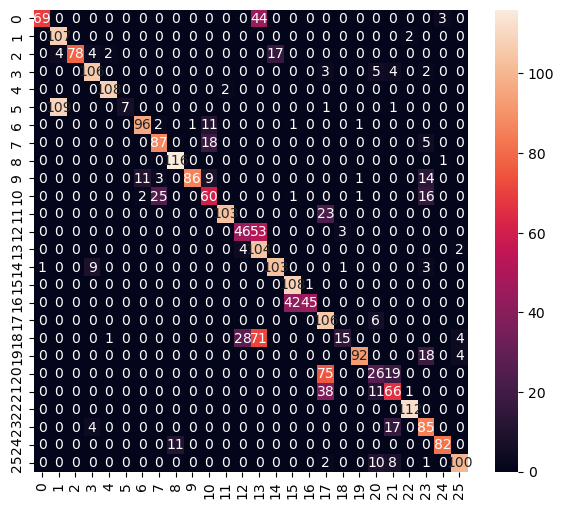

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       116
           1       0.49      0.98      0.65       109
           2       1.00      0.74      0.85       105
           3       0.86      0.88      0.87       120
           4       0.97      0.98      0.98       110
           5       1.00      0.06      0.11       118
           6       0.88      0.86      0.87       112
           7       0.74      0.79      0.77       110
           8       0.91      0.99      0.95       117
           9       0.99      0.69      0.82       124
          10       0.61      0.57      0.59       105
          11       0.98      0.82      0.89       126
          12       0.59      0.45      0.51       102
          13       0.38      0.95      0.54       110
          14       0.86      0.88      0.87       117
          15       0.71      0.99      0.83       109
          16       0.98      0.52      0.68        87
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mendez\AppData\Local\Temp\tmpp18u46it\assets


INFO:tensorflow:Assets written to: C:\Users\mendez\AppData\Local\Temp\tmpp18u46it\assets


Saved artifact at 'C:\Users\mendez\AppData\Local\Temp\tmpp18u46it'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2336115870800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2336115869072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2336115868688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2336115871184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2336115872336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2336115871568: TensorSpec(shape=(), dtype=tf.resource, name=None)


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\mendez\AppData\Local\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.34 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7299518e-03 2.7603332e-03 2.0857791e-04 1.1773159e-02 3.5253100e-04
 8.5366300e-05 5.5354969e-03 2.1542720e-03 2.7549786e-03 1.3172285e-03
 6.6287350e-03 4.4105435e-03 1.0814498e-03 6.3860854e-03 1.1786736e-03
 1.1408087e-04 4.4942386e-05 1.3583163e-03 9.5785473e-04 1.6750891e-02
 3.7680786e-02 1.8147032e-01 7.4161199e-04 6.4715005e-02 2.6441352e-03
 6.4516461e-01]
25
